In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data

niter = 10000
n = 100
p = 2
X = np.random.normal(size=(n, p))
beta = np.ones(p)

e = np.random.randn(n)
Y = X @ beta + e

θ = np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@Y
print(θ)

[0.89166715 0.99369579]


In [2]:
# Functions used for the descent method (least squares)
def F(x):
    """
    Regular Function for least sqaures
    """
    sum = 0
    for i in range(n):
        sum += (X[i].T@x - Y[i])**2
    return sum/n

B = 1
def sgradF(x, I):
    """
    Gradient Function for least squares
    """
    return 2*(X[I,:].T @ (X[I,:] @ x -Y[I]))/B

In [3]:
# Descent method using adam 
def adam(alpha, beta1, beta2, initial, e):
    """
    Function for Adam stochastic descent method 
    """
    # Define the variables
    errss = np.zeros(niter)
    theta = np.zeros((niter,p))
    g = np.zeros((niter,p))
    
    theta[0] = initial
    g[0] = sgradF(initial,  np.random.choice(np.arange(n), B))
    errss[0] = np.linalg.norm(theta[0] - θ)

    m = np.zeros((niter,p))
    v = np.zeros((niter,p))
    mhat = np.zeros((niter,p))
    vhat = np.zeros((niter,p))
    
    # Iterate through the descent algorithm
    for t in range(1, niter):
        I = np.random.choice(np.arange(n), B)
        g[t] = sgradF(theta[t-1], I)
        m[t] = beta1*m[t-1] + (1-beta1)*g[t]
        v[t] = beta2*v[t-1] + (1-beta2)*(g[t]**2)
        
        mhat[t] = m[t]/(1-beta1**t)
        vhat[t] = v[t]/(1-beta2**t)
        
        theta[t] = theta[t-1] - (alpha)*mhat[t]/(np.sqrt(vhat[t])+e) 
        errss[t] = np.linalg.norm(theta[t] - θ)
        
    return theta, errss

In [4]:
# Descent method using stochastic gradient descent
def SGD(power):    
    """
    Stochastic gradient descent with step size 1/k^power
    """
    errssgd = np.zeros(niter)
    thetasgd = np.zeros((niter,p))
    errssgd[0] = np.linalg.norm(thetasgd[0] - θ)
    
    # Iterate through descent method
    for i in range(niter-1):
        I = np.random.choice(np.arange(n), B)
        thetasgd[i+1] = thetasgd[i] - (1/((i+1)**power)) * sgradF(thetasgd[i], I)

        errssgd[i+1] = np.linalg.norm(thetasgd[i+1] - θ)  
        
    return thetasgd, errssgd

In [5]:
# Plot the descent method error
def plot_descent(error, name):
    """
    Function for plotting the error of a descent method
    """
    plt.plot(np.arange(1, niter+1),np.log10(error))
    plt.title(name)
    plt.xlabel("Iterations")
    plt.ylabel("Log error")
    plt.show()

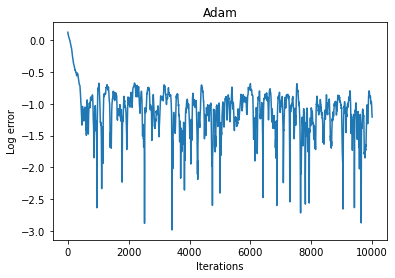

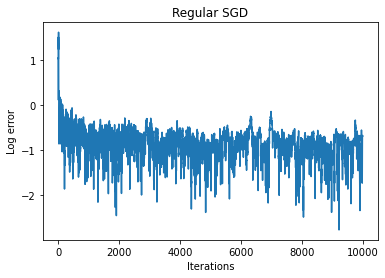

In [6]:
# Plot Adam and regular stochastic gradient descent
theta, errss = adam(0.01, 0.9, 0.99, np.zeros(p), 10**-8)
theta, errssgd = SGD(0.5)

plot_descent(errss, "Adam")
plot_descent(errssgd, "Regular SGD")

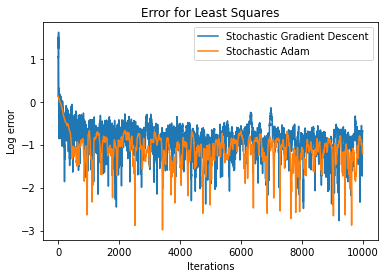

In [7]:
#Plots both Descent methods together
plt.figure()
plt.plot(np.log10(errssgd), label="Stochastic Gradient Descent")
plt.plot(np.log10(errss), label= "Stochastic Adam" )
plt.title("Error for Least Squares")
plt.xlabel("Iterations")
plt.ylabel("Log error")
plt.legend()
plt.show()

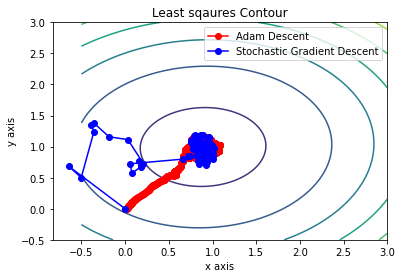

In [8]:
"""
Visualization for the descent methods for 3 dimensions
Uses a contour plot to plot descent along the least squares
"""
if p == 2:
    # Define the points for linear regression
    xaxis = np.linspace(-0.5,3, 100)
    yaxis = np.linspace(-0.5,3, 100)
    zaxis = np.zeros((100, 100))
    for i in range(100):
        for j in range(100):
            zaxis[j, i] = F([xaxis[i], yaxis[j]])

    plt.contour(yaxis, xaxis, zaxis)
    plt.title("Least sqaures Contour")
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    
    # Define and plot theta values for adam
    theta, errss = adam(0.01, 0.9, 0.999, np.zeros(p), 10**-8)    
    plt.plot(theta[:,0], theta[:, 1], 'ro-', label = "Adam Descent")    

    # Define and plot theta values for SGD
    sgtheta, errssg = SGD(0.99)
    plt.plot(sgtheta[:,0], sgtheta[:, 1], 'bo-', label = "Stochastic Gradient Descent")    
   
    plt.legend()
    plt.show()